# Conhecendo a base de dados

## Importando os dados


In [107]:
import pandas as pd

In [108]:
url = 'https://raw.githubusercontent.com/moises-rb/DataScienceOne/refs/heads/main/Aprendendo_Fazer_ETL/Pandas/pandas-dados/aluguel.csv'

dados = pd.read_csv(url, sep=';')

dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [109]:
dados.tail(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [110]:
type(dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [111]:
dados.shape

(32960, 9)

In [112]:
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [113]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [114]:
dados['Tipo']

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [115]:
dados[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [116]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [117]:
dados['Valor'].mean()

np.float64(12952.659715265761)

In [118]:
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [119]:
dados.groupby('Tipo')['Valor'].mean()

,Valor
Tipo,
Apartamento,4744.614648
Box/Garagem,1899.756098
Casa,6793.454922
Casa Comercial,14478.264151
Casa de Condomínio,11952.061245
Casa de Vila,1574.369478
Chácara,4900.000000
Conjunto Comercial/Sala,14715.045521
Flat,4546.189076


In [120]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=False)

,Valor
Tipo,
Prédio Inteiro,498637.239203
Indústria,120000.000000
Galpão/Depósito/Armazém,53407.062600
Terreno Padrão,32567.714286
Hotel,25000.000000
Loteamento/Condomínio,22000.000000
Conjunto Comercial/Sala,14715.045521
Casa Comercial,14478.264151
Loja/Salão,13769.646770


In [121]:
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=False).round(2)

,Valor
Tipo,
Prédio Inteiro,498637.24
Indústria,120000.00
Galpão/Depósito/Armazém,53407.06
Terreno Padrão,32567.71
Hotel,25000.00
Loteamento/Condomínio,22000.00
Conjunto Comercial/Sala,14715.05
Casa Comercial,14478.26
Loja/Salão,13769.65


<Axes: ylabel='Tipo'>

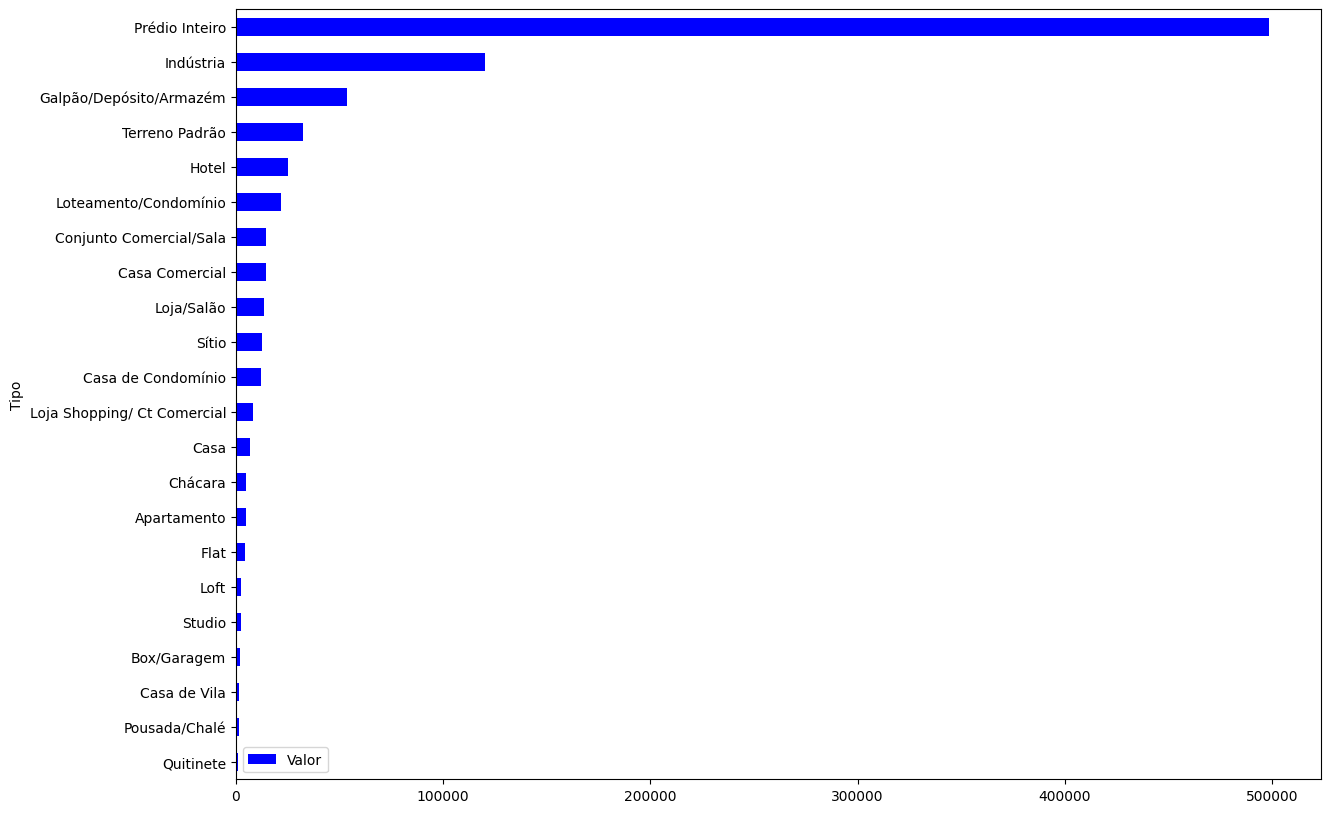

In [122]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=True).round(2)

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='blue')

## Removendo os imóveis comerciais

In [123]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [124]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão', 'Galpão/Depósito/Armazém', 'Casa Comercial', 'Terreno Padrão', 'Box/Garagem', 'Loja Shopping/ Ct Comercial', 'Box/Garagem', 'Chácara', 'Loteamento/Condomínio', 'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria', 'Studio']

In [125]:
dados.query('Tipo in @imoveis_comerciais')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [126]:
dados.query('not Tipo in @imoveis_comerciais')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [127]:
df = dados.query('not Tipo in @imoveis_comerciais')

df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [128]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft'], dtype=object)

<Axes: ylabel='Tipo'>

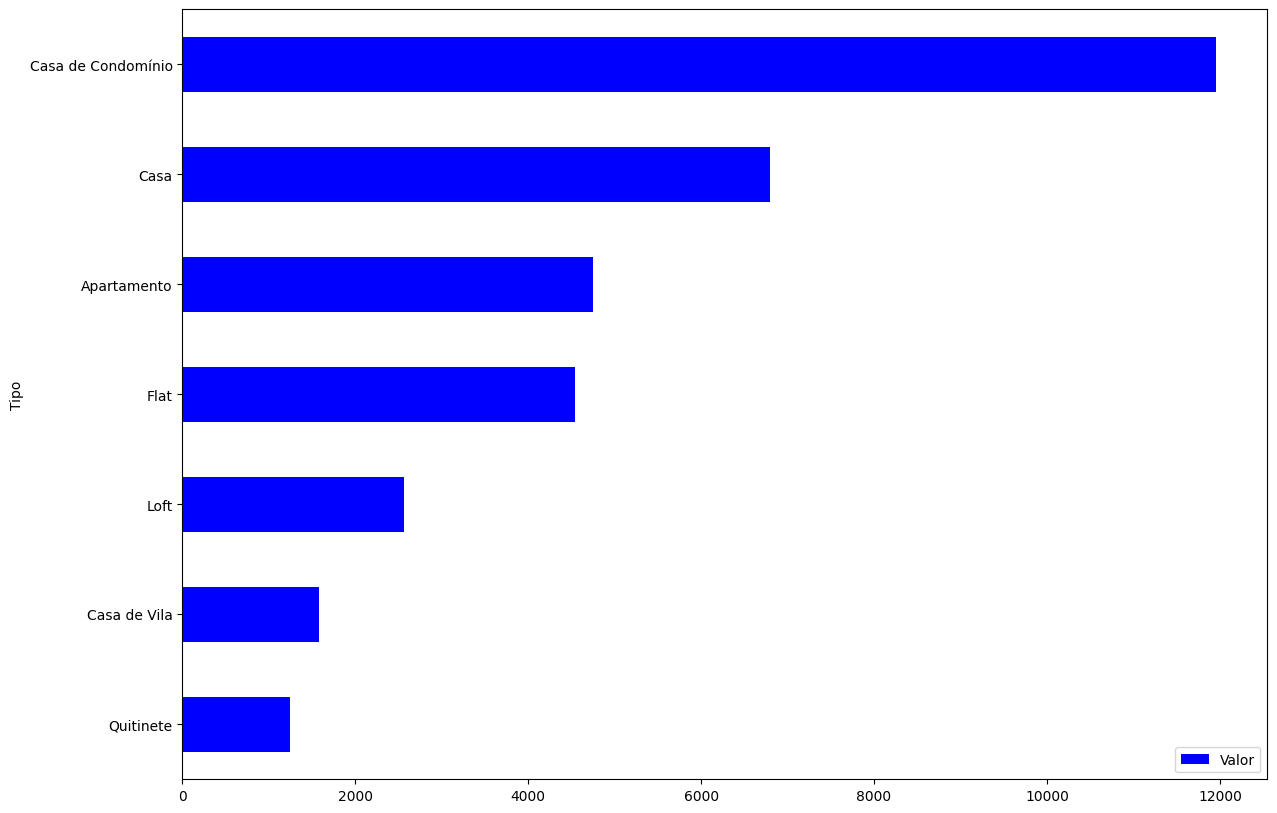

In [129]:
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor', ascending=True).round(2)

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='blue')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [130]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft'], dtype=object)

In [131]:
df.Tipo.value_counts(normalize=True)

,proportion
Tipo,
Apartamento,0.845285
Casa de Condomínio,0.043104
Casa,0.041849
Quitinete,0.036180
Flat,0.020600
Casa de Vila,0.010776
Loft,0.002207


In [132]:
df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo')

,proportion
Tipo,
Apartamento,0.845285
Casa,0.041849
Casa de Condomínio,0.043104
Casa de Vila,0.010776
Flat,0.020600
Loft,0.002207
Quitinete,0.036180


<Axes: xlabel='Tipos', ylabel='Percentual'>

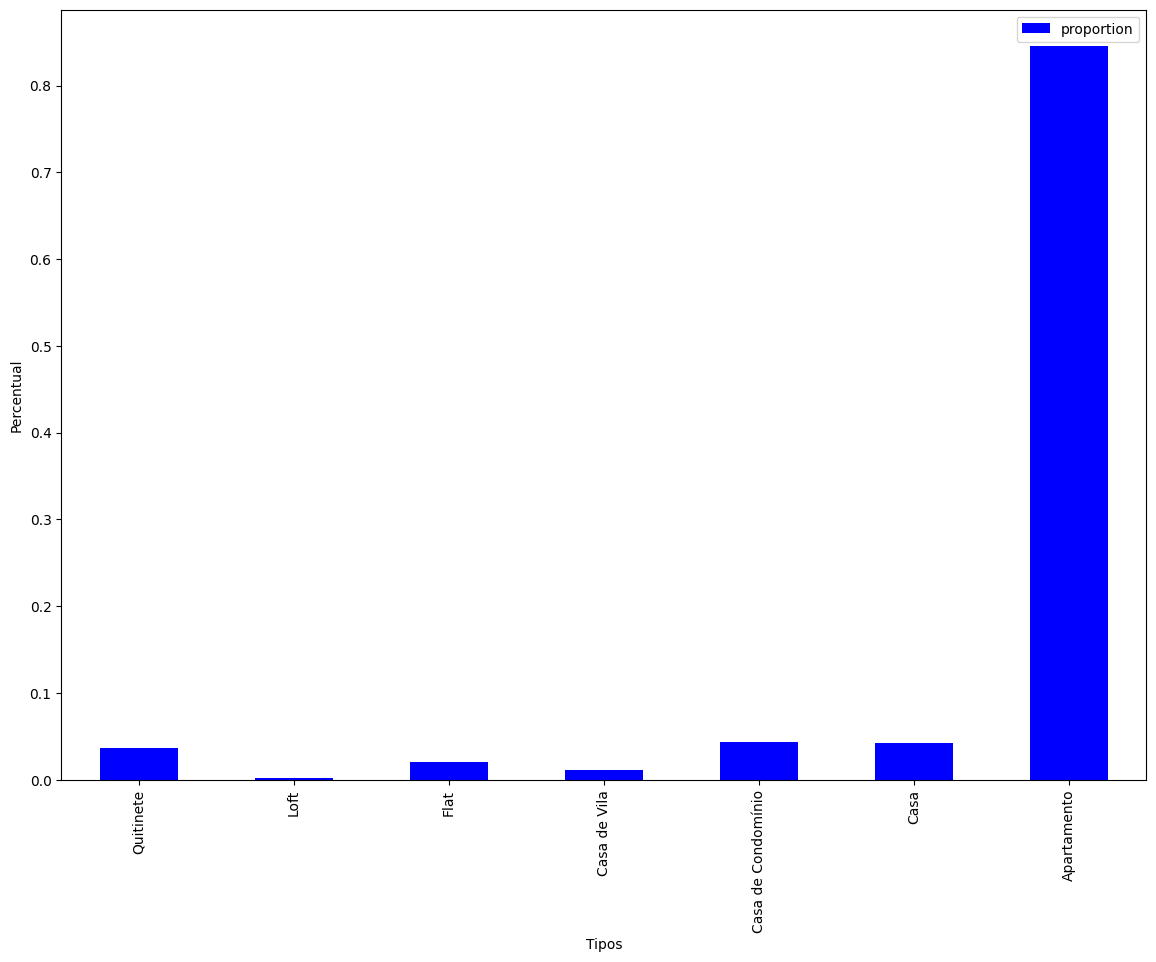

In [133]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo', ascending=False)

df_percentual_tipo.plot(kind='bar', figsize=(14, 10), color='blue', xlabel="Tipos", ylabel="Percentual")

### **Selecionando apenas os imóveis do tipo apartamento**

In [134]:
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [135]:
df = df.query('Tipo == "Apartamento"')

df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [136]:
df = df.groupby('Tipo')[['Quartos']].mean().sort_values('Quartos')

df.head()

,Quartos
Tipo,
Apartamento,2.481569


In [137]:
df['Quartos'].mean()

np.float64(2.481568707761622)

In [138]:
len(df['Bairro'].unique())

KeyError: 'Bairro'

In [ ]:
df['Bairro'].nunique()

In [ ]:
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)

In [ ]:
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()

In [ ]:
df_bairros.plot(kind='barh', figsize=(14,10), color='blue');

# Tratando e filtrando os dados

## Lidando com dados nulos

## Removendo registros

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

## Salvando os dados

# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas